In [1]:
import pandas as pd
import numpy as np
from hmmlearn import hmm
import tensorflow as tf
import re

### Question a

Recover the numerical probability value P((O0, O1, O2) = (c, a, b)) = 0.030028 in §5.2 of the
lecture notes using the forward algorithm for the computation of observation probabilities.

#### Set the model

In [2]:
states = ['state 0', 'state 1']  # This model has two states
n_states = len(states)

observations = ['a', 'b', 'c']  # The observations are a, b, c
n_observations = len(observations)

start_probability = np.array([0.6, 0.4])  # initial probability


# transition probability
transition_probability = np.array([
  [0.7, 0.3],
  [0.4, 0.6]
])

# emmission probability
emission_probability = np.array([
  [0.1, 0.4, 0.5],
  [0.7, 0.2, 0.1]
])

# model definition
model = hmm.MultinomialHMM(n_components=n_states)

# set start probability
model.startprob_=start_probability

# set transition probability
model.transmat_=transition_probability

# set emission probability
model.emissionprob_=emission_probability

In [3]:
# Compute the numerical probability value P((O0, O1, O2) = (c, a, b))

# The observations are ['c', 'a', 'b']

# Convert the observations into array
seen = np.array([[2,0,1]]).T

# Use the method "score" to compute the numerical probability
# The result is Log likelihood of probability
prob = np.e ** model.score(seen)

print('The probability is {}.'.format(prob), '\n')
print('P((O0, O1, O2) = (c, a, b)) = {}'.format(format(prob, '.2%')))


The probability is 0.030028000000000013. 

P((O0, O1, O2) = (c, a, b)) = 3.00%


### Question b

Recover the most likely sequence (0, 1, 0) given the observation (O0, O1, O2) = (c, a, b) in §5.2 of
the lecture notes by the Viterbi algorithm.

In [4]:
states = ['state 0', 'state 1']  # This model has two states
n_states = len(states)

observations = ['a', 'b', 'c']  # The observations are a, b, c
n_observations = len(observations)

start_probability = np.array([0.6, 0.4])  # initial probability


# transition probability
transition_probability = np.array([
  [0.7, 0.3],
  [0.4, 0.6]
])

# emmission probability
emission_probability = np.array([
  [0.1, 0.4, 0.5],
  [0.7, 0.2, 0.1]
])

# model definition
model = hmm.MultinomialHMM(n_components=n_states)

# set start probability
model.startprob_=start_probability

# set transition probability
model.transmat_=transition_probability

# set emission probability
model.emissionprob_=emission_probability

In [5]:
# The observations are ['c', 'a', 'b']
# Convert the observations into array
seen = np.array([[2,0,1]]).T

# Use the method "viterbi" algorithm to decode the HMM model
logprob, box = model.decode(seen, algorithm="viterbi")

print('The hidden state is {}'.format(box))

The hidden state is [0 1 0]


### Question c

Run the algorithm on a text file of your choice (minimum 1000 characters) as in §5.5 in the notes.

#### Read the text file and preprocess

I download the book "JaneEyre" and use the chaper one of this book as my text file.
It contains 1954 words and 10753 characters including space.

In [6]:
with open('my_own_text_file.txt', 'r', encoding='utf-8') as f:
    text = f.read()

In [7]:
text

'There was no possibility of taking a walk that day. We had been wandering, indeed, in the leafless shrubbery an hour in the morning; but since dinner (Mrs. Reed, when there was no company, dined early) the cold winter wind had brought with it clouds so sombre, and a rain so penetrating, that further out-door exercise was now out of the question.\nI was glad of it: I never liked long walks, especially on chilly afternoons: dreadful to me was the coming home in the raw twilight, with nipped fingers and toes, and a heart saddened by the chidings of Bessie, the nurse, and humbled by the consciousness of my physical inferiority to Eliza, John, and Georgiana Reed.\nThe said Eliza, John, and Georgiana were now clustered round their mama in the drawing-room: she lay reclined on a sofa by the fireside, and with her darlings about her (for the time neither quarrelling nor crying) looked perfectly happy. Me, she had dispensed from joining the group; saying, “She regretted to be under the necessi

In [8]:
# clean the text

pattern = re.compile('[ a-zA-Z]')
clean_text = pattern.findall(text)
for i in range(len(clean_text)):
    if clean_text[i] == ' ':
        clean_text[i] = '_'
    else:
        clean_text[i] = str.lower(clean_text[i])
print('The length of the text file is {}'.format(len(clean_text)))

The length of the text file is 10322


In [9]:
clean_text

['t',
 'h',
 'e',
 'r',
 'e',
 '_',
 'w',
 'a',
 's',
 '_',
 'n',
 'o',
 '_',
 'p',
 'o',
 's',
 's',
 'i',
 'b',
 'i',
 'l',
 'i',
 't',
 'y',
 '_',
 'o',
 'f',
 '_',
 't',
 'a',
 'k',
 'i',
 'n',
 'g',
 '_',
 'a',
 '_',
 'w',
 'a',
 'l',
 'k',
 '_',
 't',
 'h',
 'a',
 't',
 '_',
 'd',
 'a',
 'y',
 '_',
 'w',
 'e',
 '_',
 'h',
 'a',
 'd',
 '_',
 'b',
 'e',
 'e',
 'n',
 '_',
 'w',
 'a',
 'n',
 'd',
 'e',
 'r',
 'i',
 'n',
 'g',
 '_',
 'i',
 'n',
 'd',
 'e',
 'e',
 'd',
 '_',
 'i',
 'n',
 '_',
 't',
 'h',
 'e',
 '_',
 'l',
 'e',
 'a',
 'f',
 'l',
 'e',
 's',
 's',
 '_',
 's',
 'h',
 'r',
 'u',
 'b',
 'b',
 'e',
 'r',
 'y',
 '_',
 'a',
 'n',
 '_',
 'h',
 'o',
 'u',
 'r',
 '_',
 'i',
 'n',
 '_',
 't',
 'h',
 'e',
 '_',
 'm',
 'o',
 'r',
 'n',
 'i',
 'n',
 'g',
 '_',
 'b',
 'u',
 't',
 '_',
 's',
 'i',
 'n',
 'c',
 'e',
 '_',
 'd',
 'i',
 'n',
 'n',
 'e',
 'r',
 '_',
 'm',
 'r',
 's',
 '_',
 'r',
 'e',
 'e',
 'd',
 '_',
 'w',
 'h',
 'e',
 'n',
 '_',
 't',
 'h',
 'e',
 'r',
 'e',
 '_',
 'w'

#### Set the model

In [10]:
def process(array):
    return array / array.sum(axis=1).reshape(-1,1)

In [11]:
states = ['state 0', 'state 1']  # This model has two states
n_states = len(states)

observations = list('_abcdefghijklmnopqrstuvwxyz')  # The observations are alphabet charaters
n_observations = len(observations)

start_probability = np.array([0.1, 0.9])  # initial probability


# random transition probability
transition_probability = process(np.random.rand(2,2))

# random emmission probability
emission_probability = process(np.random.rand(2,27))

# model definition
model = hmm.MultinomialHMM(n_components=n_states, n_iter=100)  # 100 iterations

# set start probability
model.startprob_=start_probability

# set transition probability
model.transmat_=transition_probability

# set emission probability
model.emissionprob_=emission_probability

#### Estimate matrix M

In [12]:
# Convert observations into array

map_dict = dict(zip(observations, list(range(n_observations))))
X = [map_dict[x] for x in clean_text]
X = np.array(X).reshape(-1,1)

# train HMM model on the text by the Baum-Welch algorithm
model.fit(X)

# emmition matrix
M = model.emissionprob_

Even though the 'startprob_' attribute is set, it will be overwritten during initialization because 'init_params' contains 's'
Even though the 'transmat_' attribute is set, it will be overwritten during initialization because 'init_params' contains 't'


In [13]:
M

array([[1.10683814e-11, 7.23736660e-02, 2.41032417e-02, 2.86514908e-02,
        7.45333953e-02, 1.12037192e-01, 3.04134589e-02, 2.87192899e-02,
        3.42619416e-02, 5.99038754e-02, 3.30769837e-03, 8.75364154e-03,
        2.34649781e-02, 3.84495542e-02, 4.26954509e-02, 5.50136106e-02,
        1.68417837e-02, 1.70948154e-03, 6.69603881e-02, 8.22019825e-02,
        1.17594660e-01, 1.25707177e-02, 1.50684165e-03, 3.50414167e-02,
        6.33599084e-16, 2.88902381e-02, 4.82320451e-09],
       [4.21038679e-01, 6.16317058e-02, 5.86092001e-07, 7.91467893e-03,
        3.13096596e-18, 9.02478488e-02, 2.00288618e-05, 3.15090182e-18,
        6.29605995e-02, 5.82653794e-02, 3.69134022e-04, 6.66184447e-03,
        4.08598224e-02, 4.65224847e-04, 8.18919730e-02, 6.82394375e-02,
        7.03896327e-03, 3.23934347e-41, 3.42778754e-02, 4.72709497e-03,
        4.70312887e-04, 3.47619049e-02, 1.36810488e-02, 3.86502187e-06,
        1.56519955e-03, 1.50885562e-22, 2.90679285e-03]])

In [14]:
# The estimates of the matrix M obtained from the R code can be plotted as follows

pd.Series(M[0], index=observations).plot.bar(figsize=(15, 6))

<AxesSubplot:>

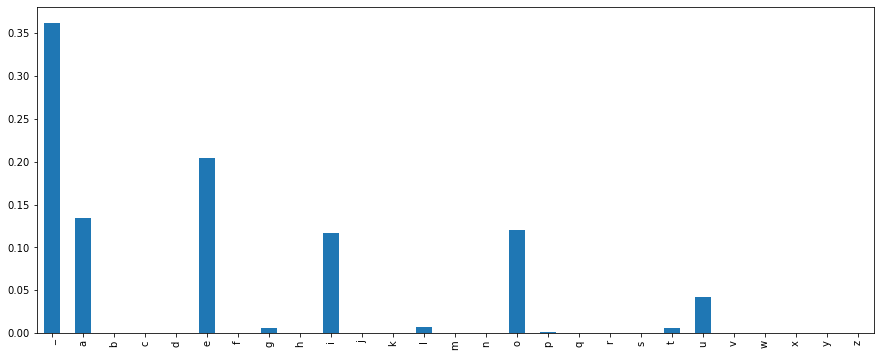

In [104]:
# plot

pd.Series(M[1], index=observations).plot.bar(figsize=(15, 6))

### Question d

Format the HMMLearn output and compare it to the output of the HMM R package.

#### R code

library (HMM)
library (lattice)

text = readChar("JaneEyreChapter1.txt",nchars=10000, useBytes = TRUE)
data <- unlist(strsplit(tolower(gsub("[^a-zA-Z]", "_", text)), ""))

pi=c(0.4,0.6)

P=t(matrix(c(c(0.6177499,0.3822501),c(0.8826096,0.1173904)),nrow=2,ncol=2))

M=t(matrix(c(c(0.037192964,0.009902360,0.032833978,0.044882670,0.057331132,
0.052143890,0.013665015,0.036187536,0.072293323,0.044793972,0.060008388,
0.004256270,0.024770706,0.053520546,0.014232306,0.046981769,0.053733382,
0.066355203,0.046817817,0.006912535,0.016201697,0.013425499,0.024694447,
0.064902148,0.046170421,0.033586536,0.022203489),
c(0.0389931197,0.0697183142,0.0239154174,0.0512772632,0.0404732634,0.0059687348,
0.0211687193,0.0625229746,0.0039632091,0.0567828864,0.0468108656,0.0168355418,
0.0627882213,0.0286478204,0.0389215263,0.0064318198,0.0001698078,0.0493758725,
0.0652709152,0.0069580806,0.0093043072,0.0028807932,0.0521827110,0.0608822385,
0.0645417465,0.0555249876,0.0576888424)),nrow=27,ncol=2))

model <- initHMM(c("0", "1"), c("_", letters), pi, P, M)

system.time(estimate <- baumWelch(model, data, 100)) # 100 iterations

xyplot(estimate$hmm$emissionProbs[1,] ~ c(1:27), scales=list(x=list(at=1:27,
labels=c("_", letters))),type="h", lwd=5, xlab="", ylab="")

xyplot(estimate$hmm$emissionProbs[2,] ~ c(1:27), scales=list(x=list(at=1:27,
labels=c("_", letters))),type="h", lwd=5, xlab="", ylab="")

#### Result from R package HMM

The estimates of the matrix M obtained from the R code are plotted as follows:

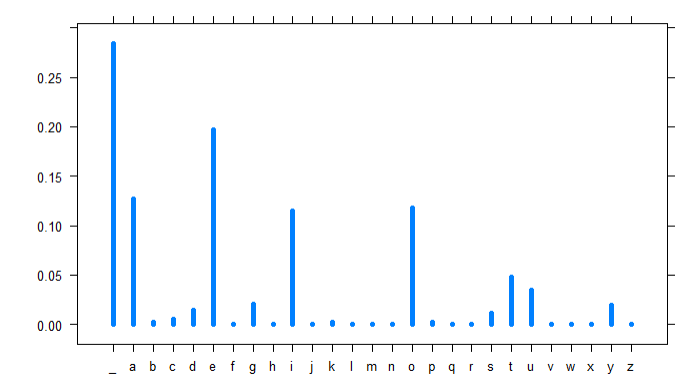

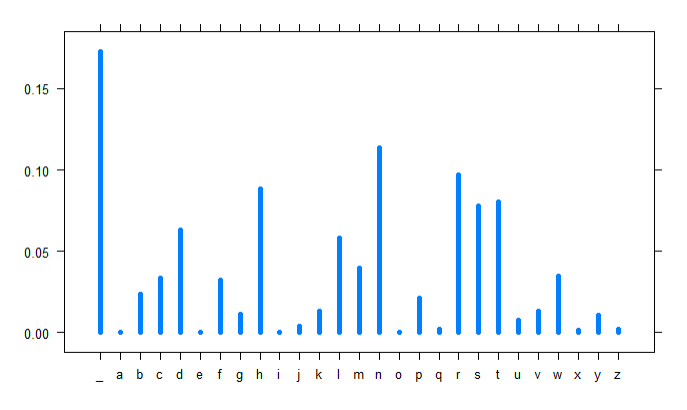

#### Frequency analysis

<AxesSubplot:>

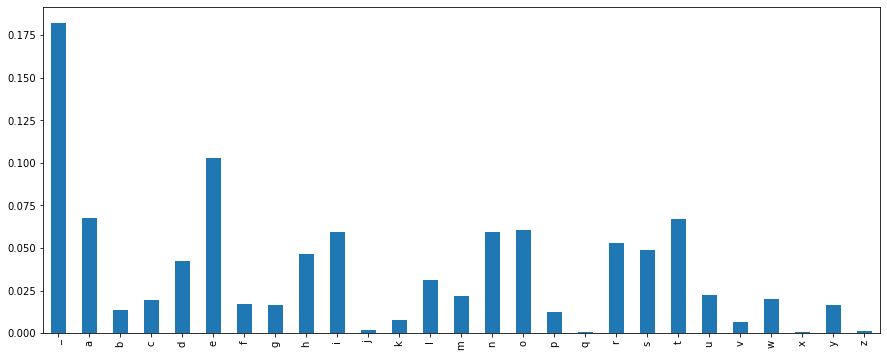

In [105]:
frequency = pd.Series(clean_text).value_counts().sort_index() / len(clean_text)

frequency.plot.bar(figsize=(15, 6))

#### Compare Python and R results

**Simillarity**

The results cumputed by Python package HMMLearn and R package HMM are simillar with each other.

we can infer that the vowels {a, e,i,u,o} are more frequently associated to the state 1 of the hidden chain in both models. Other characters are more frequently connected to state 0. Therefore, the characters are classifiled into two groups correctly.

**Difference**

From the result of R package HMM state 1, we could see there are more other characters included, like 's', 't', 'g' and 'y'. While in the result of Python package HMMLearn, the results are more concentrated on the vowels {a, e,i,u,o}. In my example, the classification accuracy of Python pakcage HMMLearn is better.